# Movies Data Analysis

In [1]:
%matplotlib inline
import requests
import json

import os
from tqdm import tqdm
import datetime
import pandas as pd
import csv
import subprocess

In [2]:
def get_latest(movie_id) -> dict:
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=76037655f8c93e4a9ae38f2eb9cd1a76"
    retries = 0
    while retries < 500:
        try:
            response = requests.get(url)
            break
        except:
            retries += 1
            time.sleep(5)
    if response.status_code == 200:
        response_in_json = json.loads(response.text)
        movies_id = int(response_in_json['id'])
    else:
        response_in_json = {}
        
    return response_in_json

In [3]:
#api call for getting latest movie details
get_latest('latest')

{'adult': False,
 'backdrop_path': None,
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [],
 'homepage': '',
 'id': 1241673,
 'imdb_id': None,
 'original_language': 'uk',
 'original_title': 'Хроники Средневековья',
 'overview': 'Shot in Kyiv, Bucha and Gostomel in May 2022, the film shows eyewitnesses of the beginning of the full-scale invasion and the following Russian occupation. The protagonists share their impressions of those days and their thoughts about the present and future.',
 'popularity': 0.0,
 'poster_path': None,
 'production_companies': [],
 'production_countries': [{'iso_3166_1': 'DE', 'name': 'Germany'}],
 'release_date': '2024-02-01',
 'revenue': 0,
 'runtime': 92,
 'spoken_languages': [{'english_name': 'Russian',
   'iso_639_1': 'ru',
   'name': 'Pусский'},
  {'english_name': 'Ukrainian', 'iso_639_1': 'uk', 'name': 'Український'}],
 'status': 'Released',
 'tagline': '',
 'title': 'Chronicles of the Middle Ages',
 'video': False,
 'vote_average': 0.0,
 'vote

In [4]:
# sample data extraction using api
from tqdm import tqdm

data =[]
for i in tqdm(range(1241)):
    dict_ = get_latest(i)
    data.append(dict_)

pd.DataFrame(data).dropna(how = 'all').head()#.to_csv('TMDB_movie_dataset_v11.csv',index=False)

100%|███████████████████████████████████████| 1241/1241 [06:26<00:00,  3.21it/s]


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
2,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,2.0,tt0094675,fi,Ariel,...,1988-10-21,0.0,73.0,"[{'english_name': 'Finnish', 'iso_639_1': 'fi'...",Released,,Ariel,False,7.085,294.0
3,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,3.0,tt0092149,fi,Varjoja paratiisissa,...,1986-10-17,0.0,74.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Shadows in Paradise,False,7.252,324.0
5,False,/f2t4JbUvQIjUF5FstG1zZFAp02N.jpg,None,4000000.0,"[{'id': 35, 'name': 'Comedy'}]",https://www.miramax.com/movie/four-rooms/,5.0,tt0113101,en,Four Rooms,...,1995-12-09,4257354.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,5.797,2507.0
6,False,/bGMqHn0H2UY6SPZ5Vch4YJM2jDO.jpg,None,21000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",,6.0,tt0107286,en,Judgment Night,...,1993-10-15,12136938.0,109.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.522,314.0
8,False,None,None,42000.0,"[{'id': 99, 'name': 'Documentary'}]",http://lifeinloops.com,8.0,tt0825671,en,Life in Loops (A Megacities RMX),...,2006-01-01,0.0,80.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A Megacities remix.,Life in Loops (A Megacities RMX),False,7.500,27.0


In [5]:
# Reading Data
import pandas as pd
df1=pd.read_csv('TMDB_movie_dataset_v11.csv')
df1.head(2)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English


In [6]:
df1.head(2)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English


## Data Cleaning and Pre-processing

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985656 entries, 0 to 985655
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    985656 non-null  int64  
 1   title                 985644 non-null  object 
 2   vote_average          985656 non-null  float64
 3   vote_count            985656 non-null  int64  
 4   status                985656 non-null  object 
 5   release_date          878749 non-null  object 
 6   revenue               985656 non-null  int64  
 7   runtime               985656 non-null  int64  
 8   adult                 985656 non-null  bool   
 9   backdrop_path         281996 non-null  object 
 10  budget                985656 non-null  int64  
 11  homepage              107008 non-null  object 
 12  imdb_id               567267 non-null  object 
 13  original_language     985656 non-null  object 
 14  original_title        985644 non-null  object 
 15  

In [8]:
df1.isnull().sum()

id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            106907
revenue                      0
runtime                      0
adult                        0
backdrop_path           703660
budget                       0
homepage                878648
imdb_id                 418389
original_language            0
original_title              12
overview                176824
popularity                   0
poster_path             267055
tagline                 843911
genres                  358912
production_companies    513260
production_countries    396302
spoken_languages        387588
dtype: int64

In [9]:
df1.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [10]:
df1.isnull().sum()

id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            106907
revenue                      0
runtime                      0
adult                        0
backdrop_path           703660
budget                       0
homepage                878648
imdb_id                 418389
original_language            0
original_title              12
overview                176824
popularity                   0
poster_path             267055
tagline                 843911
genres                  358912
production_companies    513260
production_countries    396302
spoken_languages        387588
dtype: int64

In [11]:
df1["id"].nunique()

985537

In [12]:
df1["title"].nunique()

850451

In [13]:
df1["title"].value_counts()

title
Home                        140
Untitled                    101
Alone                        89
Mother                       82
The Box                      68
                           ... 
Man Against Woman             1
Entre Visitantes              1
Brasil, 1984                  1
Asses Up! 2                   1
My Brother is Dr. Moles.      1
Name: count, Length: 850451, dtype: int64

In [14]:
df1 = df1.dropna(subset=['title'])

In [15]:
df1.shape

(985644, 23)

In [16]:
df1.status.unique()

array(['Released', 'Planned', 'Post Production', 'In Production',
       'Rumored', 'Canceled'], dtype=object)

In [17]:
#removing rows with nan as release date
df1= df1.dropna(subset=['release_date'])

In [18]:
df1.shape

(878745, 23)

In [19]:
#dropping not required columns
df1=df1.drop(columns=['backdrop_path','homepage','imdb_id','original_title','overview','poster_path','tagline'])

In [20]:
df1.shape

(878745, 16)

In [21]:
df1.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878745 entries, 0 to 985655
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    878745 non-null  int64  
 1   title                 878745 non-null  object 
 2   vote_average          878745 non-null  float64
 3   vote_count            878745 non-null  int64  
 4   status                878745 non-null  object 
 5   release_date          878745 non-null  object 
 6   revenue               878745 non-null  int64  
 7   runtime               878745 non-null  int64  
 8   adult                 878745 non-null  bool   
 9   budget                878745 non-null  int64  
 10  original_language     878745 non-null  object 
 11  popularity            878745 non-null  float64
 12  genres                598472 non-null  object 
 13  production_companies  458003 non-null  object 
 14  production_countries  572211 non-null  object 
 15  spoke

In [23]:
df1.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
popularity                   0
genres                  280273
production_companies    420742
production_countries    306534
spoken_languages        305980
dtype: int64

In [24]:
df1.genres.value_counts()

genres
Documentary                                116057
Drama                                       94629
Comedy                                      53620
Animation                                   27251
Music                                       22428
                                            ...  
Comedy, Action, Drama, Mystery, Fantasy         1
Adventure, Mystery, History, Thriller           1
Thriller, Drama, Romance, Fantasy               1
War, Comedy, Action                             1
Documentary, Comedy, Music, Crime               1
Name: count, Length: 12278, dtype: int64

In [25]:
df1[df1['genres']=='Documentary'].head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages
1460,899082,Harry Potter 20th Anniversary: Return to Hogwarts,7.302,3084,Released,2022-01-01,0,103,False,0,en,39.800,Documentary,"Pulse Films, Warner Horizon Unscripted Televis...","United Kingdom, United States of America",English
2785,9372,Super Size Me,6.741,1515,Released,2004-01-17,28575078,100,False,65000,en,10.989,Documentary,"Kathbur Pictures, Samuel Goldwyn Films, The Co...",United States of America,English
3178,1777,Fahrenheit 9/11,7.079,1301,Released,2004-06-25,222446882,123,False,6000000,en,13.982,Documentary,"Fellowship Adventure Group, BIM Distribuzione,...",United States of America,"English, Persian"
3449,293310,Citizenfour,7.758,1186,Released,2014-10-10,3003169,114,False,0,en,9.308,Documentary,"Praxis Films, Participant, HBO Documentary Fil...","Germany, United Kingdom, United States of America","English, German, Portuguese"
3703,691179,Friends: The Reunion,7.900,1082,Released,2021-05-27,0,104,False,0,en,19.691,Documentary,"Bright/Kauffman/Crane Productions, Warner Hori...",United States of America,English


In [26]:
df1.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,8.787450e+05,878745.000000,878745.000000,8.787450e+05,878745.000000,8.787450e+05,878745.000000
mean,6.209214e+05,2.338493,24.393680,8.249405e+05,54.509407,3.219044e+05,1.470486
std,3.429927e+05,3.179571,362.060241,1.865187e+07,63.062913,5.250287e+06,8.611375
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,0.000000,0.000000e+00,0.000000
25%,3.412780e+05,0.000000,0.000000,0.000000e+00,4.000000,0.000000e+00,0.600000
50%,6.135920e+05,0.000000,0.000000,0.000000e+00,50.000000,0.000000e+00,0.600000
75%,9.150260e+05,5.500000,2.000000,0.000000e+00,91.000000,0.000000e+00,1.032000
max,1.237356e+06,10.000000,34495.000000,3.000000e+09,14400.000000,8.880000e+08,2994.357000


In [27]:
df1['vote_average'].value_counts()

vote_average
0.000     538880
6.000      29715
5.000      29427
7.000      23168
10.000     20883
           ...  
8.449          1
3.657          1
2.402          1
8.127          1
0.750          1
Name: count, Length: 5023, dtype: int64

In [28]:
df1[df1['vote_average']==0].head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages
151156,376967,Home Invader,0.0,3,Released,2016-04-08,0,0,False,200,en,0.600,Thriller,NaN,United States of America,English
151441,397117,MMXII,0.0,3,Released,2016-11-11,0,108,False,0,en,0.703,"Adventure, Drama",Natural Wonders Productions,United States of America,English
161728,255487,The Boyfriend,0.0,3,Released,2015-02-11,0,110,False,150000,en,0.600,"Drama, Romance",Productive Film,United Kingdom,English
162389,479352,Winter Hunt,0.0,3,Released,2019-06-26,0,78,False,0,de,0.987,"Thriller, Drama",ZDF,Germany,German
163087,472957,Dark Is the Night,0.0,3,Released,2018-08-15,0,106,False,0,tl,0.758,Drama,"Oro de Siete Productions Inc., Swift Productions",Philippines,Tagalog


In [29]:
df1['vote_count'].value_counts()

vote_count
0        538671
1        116590
2         48500
3         28512
4         20742
          ...  
3339          1
3338          1
1343          1
1345          1
34495         1
Name: count, Length: 3598, dtype: int64

In [30]:
df1['status'].value_counts()

status
Released           875167
In Production        1990
Post Production      1219
Planned               355
Rumored                 8
Canceled                6
Name: count, dtype: int64

In [31]:
df1['release_date'] = pd.to_datetime(df1['release_date'])
df1['release_date'].dt.month.unique()

array([ 7, 11, 12,  4,  2, 10,  9,  6,  3,  5,  8,  1], dtype=int32)

In [32]:
df1['release_date'].dt.year.unique()

array([2010, 2014, 2008, 2009, 2012, 2016, 2018, 1999, 1994, 2001, 2019,
       1997, 2003, 2013, 2015, 2017, 2002, 2011, 2004, 2005, 1995, 1977,
       1972, 1985, 2021, 2007, 2000, 1998, 1980, 1993, 1991, 2006, 1983,
       1992, 1979, 1982, 1990, 1971, 1984, 1989, 1981, 1974, 1976, 1968,
       1988, 2022, 1987, 2020, 1975, 1960, 1996, 1986, 1966, 1957, 1973,
       1937, 1978, 2023, 1950, 1954, 1961, 1967, 1951, 1940, 1958, 1942,
       1939, 1964, 1941, 1953, 1943, 1955, 1959, 1970, 1946, 1963, 1965,
       1936, 1962, 1952, 1927, 1948, 1969, 1931, 1921, 1922, 1949, 1944,
       1902, 1925, 1956, 1920, 1933, 1929, 1934, 1926, 1932, 1938, 1924,
       1935, 1928, 1945, 1930, 1947, 1903, 1915, 1923, 1897, 1916, 1895,
       1918, 1917, 1911, 1919, 1910, 1888, 1898, 1904, 1896, 1901, 1914,
       1908, 1900, 1899, 1874, 1912, 1894, 1893, 1890, 1892, 1909, 1887,
       1913, 1905, 1891, 1906, 1907, 1885, 1878, 1889, 1882, 2024, 2025,
       1865, 2026, 2029, 1883, 2027, 1800, 2032, 18

In [33]:
df1['release_date'].dt.day.unique()

array([15,  5, 16, 25,  9, 30, 10, 23, 24, 18,  1, 14, 22, 27, 17, 13, 19,
       12,  3, 31, 21, 28,  2,  6,  8, 20,  4, 29, 11, 26,  7],
      dtype=int32)

In [34]:
from datetime import datetime
aa = df1[df1['status']=='Released']
aa[aa['release_date']>datetime.now()].shape

(176, 16)

In [35]:
aa = df1[df1['status']=='In Production']
aa[aa['release_date']<datetime.now()].shape

(1516, 16)

In [36]:
aa = df1[df1['status']=='Post Production']
aa[aa['release_date']<datetime.now()].shape

(1000, 16)

In [37]:
# making sure that if the status of movie is released then its release date should be less than todays date.
df1=df1[~((df1['status'] == 'Released') & (df1['release_date'] > datetime.now()))]
df1=df1[df1['status']=='Released']
df1.shape

(874991, 16)

In [38]:
df1=df1[~df1['revenue']<0]
df1.shape

(874990, 16)

In [39]:
df1['runtime'].value_counts()

runtime
0      184659
90      26835
10      13669
7       12575
5       12296
        ...  
607         1
584         1
653         1
820         1
539         1
Name: count, Length: 692, dtype: int64

In [40]:
df1['runtime'].describe()

count    874990.000000
mean         54.616925
std          63.106489
min           0.000000
25%           4.000000
50%          50.000000
75%          91.000000
max       14400.000000
Name: runtime, dtype: float64

In [41]:
df1=df1[df1['runtime']>0]
df1.shape

(690331, 16)

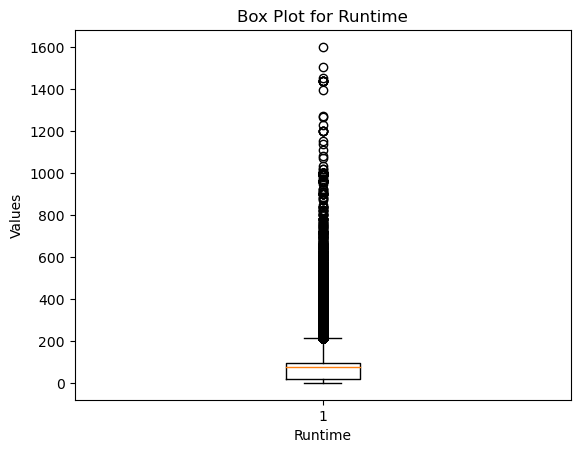

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df1[df1['runtime']<2000]['runtime'])

plt.xlabel('Runtime')
plt.ylabel('Values')
plt.title('Box Plot for Runtime')

plt.show()


In [43]:
# Capping runtime to 300 minutes
df1.loc[df1['runtime']>=300,'runtime']=300

In [44]:
df1['runtime'].describe()

count    690331.000000
mean         68.623386
std          49.898349
min           1.000000
25%          19.000000
50%          75.000000
75%          97.000000
max         300.000000
Name: runtime, dtype: float64

In [45]:
df1['adult'].unique()

array([False,  True])

In [46]:
df1['budget'].value_counts()

budget
0          653257
10000         951
100           772
1000          765
5000          762
            ...  
26162           1
453500          1
7492030         1
13125           1
83691           1
Name: count, Length: 4567, dtype: int64

In [47]:
df1['budget'].describe()

count    6.903310e+05
mean     4.012749e+05
std      5.723148e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.880000e+08
Name: budget, dtype: float64

In [48]:
(df1['release_date'].dt.year.unique())

array([2010, 2014, 2008, 2009, 2012, 2016, 2018, 1999, 1994, 2001, 2019,
       1997, 2003, 2013, 2015, 2017, 2002, 2011, 2004, 2005, 1995, 1977,
       1972, 1985, 2021, 2007, 2000, 1998, 1980, 1993, 1991, 2006, 1983,
       1992, 1979, 1982, 1990, 1971, 1984, 1989, 1981, 1974, 1976, 1968,
       1988, 2022, 1987, 2020, 1975, 1960, 1996, 1986, 1966, 1957, 1973,
       1937, 1978, 2023, 1950, 1954, 1961, 1967, 1951, 1940, 1958, 1942,
       1939, 1964, 1941, 1953, 1943, 1955, 1959, 1970, 1946, 1963, 1965,
       1936, 1962, 1952, 1927, 1948, 1969, 1931, 1921, 1922, 1949, 1944,
       1902, 1925, 1956, 1920, 1933, 1929, 1934, 1926, 1932, 1938, 1924,
       1935, 1928, 1945, 1930, 1947, 1903, 1915, 1923, 1897, 1916, 1895,
       1918, 1917, 1911, 1919, 1910, 1888, 1898, 1904, 1896, 1901, 1914,
       1908, 1900, 1899, 1874, 1912, 1894, 1893, 1890, 1892, 1909, 1887,
       1913, 1905, 1891, 1906, 1907, 1885, 1878, 1889, 1882, 2024, 1865,
       1883, 1800, 1867], dtype=int32)

In [49]:
df1.shape

(690331, 16)

In [50]:
df1[df1['budget'] == 0].head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages
258,372058,Your Name.,8.514,10303,Released,2016-08-26,357986087,106,False,0,ja,68.999,"Romance, Animation, Drama","CoMix Wave Films, TOHO, KADOKAWA, East Japan M...",Japan,Japanese
375,664413,365 Days,7.063,8429,Released,2020-02-07,9458590,116,False,0,pl,32.781,"Romance, Drama","Ekipa, Future Space, Next Film, TVN Group",Poland,"English, French, Italian, Polish"
395,466282,To All the Boys I've Loved Before,7.642,8045,Released,2018-08-16,0,100,False,0,en,38.926,"Comedy, Romance","Awesomeness Films, Overbrook Entertainment",United States of America,English
509,454983,The Kissing Booth,7.229,6926,Released,2018-05-11,0,105,False,0,en,36.649,"Romance, Comedy",Komixx Entertainment,United Kingdom,English
652,200727,"Love, Rosie",7.837,5918,Released,2014-10-16,4439431,102,False,0,en,29.428,"Romance, Drama, Comedy","Constantin Film, Octagon Films, Canyon Creek F...","Belgium, Canada, Germany, Ireland, United Kingdom",English


In [51]:
df1[df1['budget'] == 0].shape

(653257, 16)

In [52]:
df1.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,6.903310e+05,690331.000000,690331.000000,690331,6.903310e+05,690331.000000,6.903310e+05,690331.000000
mean,5.955718e+05,2.607708,30.906132,1999-09-23 02:38:40.719770752,1.045722e+06,68.623386,4.012749e+05,1.659840
min,2.000000e+00,0.000000,0.000000,1800-09-11 00:00:00,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,3.186115e+05,0.000000,0.000000,1989-01-01 00:00:00,0.000000e+00,19.000000,0.000000e+00,0.600000
50%,5.845640e+05,0.000000,0.000000,2010-04-26 00:00:00,0.000000e+00,75.000000,0.000000e+00,0.600000
75%,8.783315e+05,5.800000,2.000000,2018-06-01 00:00:00,0.000000e+00,97.000000,0.000000e+00,1.179000
max,1.237356e+06,10.000000,34495.000000,2024-02-04 00:00:00,3.000000e+09,300.000000,8.880000e+08,2994.357000
std,3.435721e+05,3.226817,408.246119,NaN,2.100557e+07,49.898349,5.723148e+06,9.657504


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690331 entries, 0 to 985655
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    690331 non-null  int64         
 1   title                 690331 non-null  object        
 2   vote_average          690331 non-null  float64       
 3   vote_count            690331 non-null  int64         
 4   status                690331 non-null  object        
 5   release_date          690331 non-null  datetime64[ns]
 6   revenue               690331 non-null  int64         
 7   runtime               690331 non-null  int64         
 8   adult                 690331 non-null  bool          
 9   budget                690331 non-null  int64         
 10  original_language     690331 non-null  object        
 11  popularity            690331 non-null  float64       
 12  genres                491435 non-null  object        
 13  prod

In [54]:
df1[["title","vote_average","vote_count","release_date","original_language","popularity"]].head()

,title,vote_average,vote_count,release_date,original_language,popularity
0,Inception,8.364,34495,2010-07-15,en,83.952
1,Interstellar,8.417,32571,2014-11-05,en,140.241
2,The Dark Knight,8.512,30619,2008-07-16,en,130.643
3,Avatar,7.573,29815,2009-12-15,en,79.932
4,The Avengers,7.710,29166,2012-04-25,en,98.082


In [55]:
df1["status"].value_counts()

status
Released    690331
Name: count, dtype: int64

In [56]:
for i in df1.columns:
    print(df1[i].value_counts())

id
1210318    2
1199214    2
1205264    2
1213633    2
1235259    2
          ..
1048614    1
465498     1
922975     1
545515     1
1237153    1
Name: count, Length: 690323, dtype: int64
title
Home                                        110
Alone                                        79
Untitled                                     74
Mother                                       73
Silence                                      58
                                           ... 
2 Girls, 1 Crazy Trip to Mexico: Origins      1
The Harem Bunch                               1
La chica                                      1
Billy Crystal: Midnight Train to Moscow       1
My Brother is Dr. Moles.                      1
Name: count, Length: 592309, dtype: int64
vote_average
0.000     390944
6.000      25212
5.000      23326
7.000      19432
10.000     16181
           ...  
8.279          1
3.657          1
2.402          1
8.127          1
0.750          1
Name: count, Length: 5013, dtype: in

In [57]:
df1[["vote_average","vote_count","revenue","popularity"]].corr()

,vote_average,vote_count,revenue,popularity
vote_average,1.000000,0.099101,0.063799,0.113946
vote_count,0.099101,1.000000,0.760885,0.253030
revenue,0.063799,0.760885,1.000000,0.247715
popularity,0.113946,0.253030,0.247715,1.000000


In [58]:
df1['original_language'].unique()

array(['en', 'ko', 'fr', 'ja', 'it', 'es', 'pl', 'pt', 'hi', 'tr', 'da',
       'de', 'cn', 'id', 'zh', 'sv', 'el', 'ru', 'sr', 'fa', 'th', 'ar',
       'no', 'nb', 'fi', 'te', 'la', 'nl', 'hu', 'he', 'is', 'ro', 'gl',
       'uk', 'eu', 'et', 'bs', 'bn', 'xx', 'sh', 'km', 'cs', 'tn', 'ml',
       'mk', 'ga', 'hy', 'ku', 'ka', 'ta', 'kn', 'tl', 'vi', 'ca', 'dz',
       'sw', 'wo', 'kk', 'sk', 'lv', 'mi', 'bo', 'mn', 'ps', 'lt', 'ur',
       'sl', 'sc', 'af', 'hr', 'iu', 'se', 'ms', 'bm', 'mr', 'bg', 'lo',
       'cy', 'am', 'xh', 'qu', 'yi', 'yo', 'pa', 'sq', 'eo', 'gu', 'zu',
       'st', 'ne', 'ak', 'mt', 'rw', 'ay', 'ln', 'as', 'mo', 'si', 'ff',
       'so', 'ky', 'az', 'ab', 'ik', 'kl', 'jv', 'fo', 'sn', 'li', 'my',
       'ks', 'su', 'tg', 'ht', 'lb', 'sm', 'rm', 'ha', 'sa', 'tk', 'fy',
       'or', 'bi', 'ny', 'gd', 'be', 'om', 'uz', 'cr', 'mg', 'mh', 'tw',
       'co', 'nn', 'gn', 'ug', 'nv', 'tt', 'os', 'ig', 'ie', 'kw', 'dv',
       'sg', 'nd', 'to', 'kg', 'ti', 'ce', 'oc', 'c

In [59]:
# mapping the language codes with actual language names
language_codes = {
    'en': 'English', 'ko': 'Korean', 'fr': 'French', 'ja': 'Japanese', 'it': 'Italian',
    'es': 'Spanish', 'pl': 'Polish', 'pt': 'Portuguese', 'hi': 'Hindi', 'tr': 'Turkish',
    'da': 'Danish', 'de': 'German', 'cn': 'Chinese', 'id': 'Indonesian', 'zh': 'Chinese',
    'sv': 'Swedish', 'el': 'Greek', 'ru': 'Russian', 'sr': 'Serbian', 'fa': 'Persian',
    'th': 'Thai', 'ar': 'Arabic', 'no': 'Norwegian', 'nb': 'Norwegian Bokmål',
    'fi': 'Finnish', 'te': 'Telugu', 'la': 'Latin', 'nl': 'Dutch', 'hu': 'Hungarian',
    'he': 'Hebrew', 'is': 'Icelandic', 'ro': 'Romanian', 'gl': 'Galician', 'uk': 'Ukrainian',
    'eu': 'Basque', 'et': 'Estonian', 'bs': 'Bosnian', 'bn': 'Bengali', 'xx': 'Unknown',
    'sh': 'Serbo-Croatian', 'km': 'Khmer', 'cs': 'Czech', 'tn': 'Tswana', 'ml': 'Malayalam',
    'mk': 'Macedonian', 'ga': 'Irish', 'hy': 'Armenian', 'ku': 'Kurdish', 'ka': 'Georgian',
    'ta': 'Tamil', 'kn': 'Kannada', 'tl': 'Tagalog', 'vi': 'Vietnamese', 'ca': 'Catalan',
    'dz': 'Dzongkha', 'sw': 'Swahili', 'wo': 'Wolof', 'kk': 'Kazakh', 'sk': 'Slovak',
    'lv': 'Latvian', 'mi': 'Maori', 'bo': 'Tibetan', 'mn': 'Mongolian', 'ps': 'Pashto',
    'lt': 'Lithuanian', 'ur': 'Urdu', 'sl': 'Slovenian', 'sc': 'Sardinian', 'af': 'Afrikaans',
    'hr': 'Croatian', 'iu': 'Inuktitut', 'se': 'Northern Sami', 'ms': 'Malay',
    'bm': 'Bambara', 'mr': 'Marathi', 'bg': 'Bulgarian', 'lo': 'Lao', 'cy': 'Welsh',
    'am': 'Amharic', 'xh': 'Xhosa', 'qu': 'Quechua', 'yi': 'Yiddish', 'yo': 'Yoruba',
    'pa': 'Punjabi', 'sq': 'Albanian', 'eo': 'Esperanto', 'gu': 'Gujarati', 'zu': 'Zulu',
    'st': 'Southern Sotho', 'ne': 'Nepali', 'ak': 'Akan', 'mt': 'Maltese', 'rw': 'Kinyarwanda',
    'ay': 'Aymara', 'ln': 'Lingala', 'as': 'Assamese', 'mo': 'Moldovan', 'si': 'Sinhala',
    'ff': 'Fulah', 'so': 'Somali', 'ky': 'Kyrgyz', 'az': 'Azerbaijani', 'ab': 'Abkhazian',
    'ik': 'Inupiaq', 'kl': 'Kalaallisut', 'jv': 'Javanese', 'fo': 'Faroese', 'sn': 'Shona',
    'li': 'Limburgish', 'my': 'Burmese', 'ks': 'Kashmiri', 'su': 'Sundanese', 'tg': 'Tajik',
    'ht': 'Haitian Creole', 'lb': 'Luxembourgish', 'sm': 'Samoan', 'rm': 'Romansh',
    'ha': 'Hausa', 'sa': 'Sanskrit', 'tk': 'Turkmen', 'fy': 'Western Frisian', 'or': 'Oriya',
    'bi': 'Bislama', 'ny': 'Chichewa', 'gd': 'Scottish Gaelic', 'be': 'Belarusian',
    'om': 'Oromo', 'uz': 'Uzbek', 'cr': 'Cree', 'mg': 'Malagasy', 'mh': 'Marshallese',
    'tw': 'Twi', 'co': 'Corsican', 'nn': 'Norwegian Nynorsk', 'gn': 'Guarani', 'ug': 'Uighur',
    'nv': 'Navajo', 'tt': 'Tatar', 'os': 'Ossetian', 'ig': 'Igbo', 'ie': 'Interlingue',
    'kw': 'Cornish', 'dv': 'Divehi', 'sg': 'Sango', 'nd': 'Northern Ndebele', 'to': 'Tongan',
    'kg': 'Kongo', 'ti': 'Tigrinya', 'ce': 'Chechen', 'oc': 'Occitan', 'cv': 'Chuvash',
    'kv': 'Komi', 'kj': 'Kuanyama', 'lg': 'Ganda', 'br': 'Breton', 'oj': 'Ojibwa',
    'ch': 'Chamorro', 'hz': 'Herero', 'ty': 'Tahitian', 'ia': 'Interlingua', 'aa': 'Afar',
    'ba': 'Bashkir', 'ki': 'Kikuyu', 'ss': 'Swati', 'rn': 'Rundi', 'fj': 'Fijian',
    'sd': 'Sindhi', 'gv': 'Manx', 'ii': 'Sichuan Yi', 'ts': 'Tsonga'
}

df1['original_language'] = df1['original_language'].map(language_codes)


In [60]:
df1['original_language'].unique()

array(['English', 'Korean', 'French', 'Japanese', 'Italian', 'Spanish',
       'Polish', 'Portuguese', 'Hindi', 'Turkish', 'Danish', 'German',
       'Chinese', 'Indonesian', 'Swedish', 'Greek', 'Russian', 'Serbian',
       'Persian', 'Thai', 'Arabic', 'Norwegian', 'Norwegian Bokmål',
       'Finnish', 'Telugu', 'Latin', 'Dutch', 'Hungarian', 'Hebrew',
       'Icelandic', 'Romanian', 'Galician', 'Ukrainian', 'Basque',
       'Estonian', 'Bosnian', 'Bengali', 'Unknown', 'Serbo-Croatian',
       'Khmer', 'Czech', 'Tswana', 'Malayalam', 'Macedonian', 'Irish',
       'Armenian', 'Kurdish', 'Georgian', 'Tamil', 'Kannada', 'Tagalog',
       'Vietnamese', 'Catalan', 'Dzongkha', 'Swahili', 'Wolof', 'Kazakh',
       'Slovak', 'Latvian', 'Maori', 'Tibetan', 'Mongolian', 'Pashto',
       'Lithuanian', 'Urdu', 'Slovenian', 'Sardinian', 'Afrikaans',
       'Croatian', 'Inuktitut', 'Northern Sami', 'Malay', 'Bambara',
       'Marathi', 'Bulgarian', 'Lao', 'Welsh', 'Amharic', 'Xhosa',
       'Quechua

In [61]:
df1['popularity'].describe()

count    690331.000000
mean          1.659840
std           9.657504
min           0.000000
25%           0.600000
50%           0.600000
75%           1.179000
max        2994.357000
Name: popularity, dtype: float64

In [62]:
df1[df1['popularity']==2994.357000]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages
3870,565770,Blue Beetle,7.139,1023,Released,2023-08-16,124818235,128,False,120000000,English,2994.357,"Action, Science Fiction, Adventure","Warner Bros. Pictures, The Safran Company, DC ...",United States of America,"English, Portuguese, Spanish"


In [63]:
genres_dummies = df1['genres'].str.get_dummies(', ')
genres_dummies = genres_dummies.astype(bool)

df1 = pd.concat([df1, genres_dummies], axis=1)


In [64]:
df1.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,False,False,False,False,False,True,False,False,False,False
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,False,False,False,False,False,True,False,False,False,False
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,False,False,False,False,False,False,False,True,False,False
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,False,False,False,False,False,True,False,False,False,False
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,False,False,False,False,False,True,False,False,False,False


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690331 entries, 0 to 985655
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    690331 non-null  int64         
 1   title                 690331 non-null  object        
 2   vote_average          690331 non-null  float64       
 3   vote_count            690331 non-null  int64         
 4   status                690331 non-null  object        
 5   release_date          690331 non-null  datetime64[ns]
 6   revenue               690331 non-null  int64         
 7   runtime               690331 non-null  int64         
 8   adult                 690331 non-null  bool          
 9   budget                690331 non-null  int64         
 10  original_language     690331 non-null  object        
 11  popularity            690331 non-null  float64       
 12  genres                491435 non-null  object        
 13  prod

In [66]:
df1['production_companies'].unique()

array(['Legendary Pictures, Syncopy, Warner Bros. Pictures',
       'Legendary Pictures, Syncopy, Lynda Obst Productions',
       'DC Comics, Legendary Pictures, Syncopy, Isobel Griffiths, Warner Bros. Pictures',
       ..., 'Check Six Productions',
       'Paragon Home Video, Queeriosity Video Project',
       'Making Movies, Finnish Film Foundation, AVEK, YLE'], dtype=object)

In [67]:
df1['production_countries'].unique()

array(['United Kingdom, United States of America',
       'United States of America, United Kingdom',
       'United States of America', ..., 'China, Indonesia',
       'Belarus, Canada, Thailand, United States of America',
       'Senegal, South Africa'], dtype=object)

In [68]:
df1['spoken_languages'].unique()

array(['English, French, Japanese, Swahili', 'English',
       'English, Mandarin', ..., 'German, Raeto-Romance, Serbian',
       'Assamese, Bengali, Gujarati, Malayalam, Marathi, Punjabi, Tamil, Telugu',
       'Norwegian, Russian, Spanish'], dtype=object)

In [69]:
df1=df1.drop(columns=['id','status'])

In [70]:
df1.head()

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Inception,8.364,34495,2010-07-15,825532764,148,False,160000000,English,83.952,...,False,False,False,False,False,True,False,False,False,False
1,Interstellar,8.417,32571,2014-11-05,701729206,169,False,165000000,English,140.241,...,False,False,False,False,False,True,False,False,False,False
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,185000000,English,130.643,...,False,False,False,False,False,False,False,True,False,False
3,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,English,79.932,...,False,False,False,False,False,True,False,False,False,False
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,English,98.082,...,False,False,False,False,False,True,False,False,False,False


In [71]:
df1=df1.drop_duplicates()

In [72]:
df1.shape

(690304, 33)

In [73]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.head(10)

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Inception,8.364,34495,2010-07-15,825532764,148,False,160000000,English,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,Interstellar,8.417,32571,2014-11-05,701729206,169,False,165000000,English,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,185000000,English,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
3,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,English,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,English,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,Deadpool,7.606,28894,2016-02-09,783100000,108,False,58000000,English,72.735,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,Avengers: Infinity War,8.255,27713,2018-04-25,2052415039,149,False,300000000,English,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
7,Fight Club,8.438,27238,1999-10-15,100853753,139,False,63000000,English,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,Guardians of the Galaxy,7.906,26638,2014-07-30,772776600,121,False,170000000,English,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9,Pulp Fiction,8.488,25893,1994-09-10,213900000,154,False,8500000,English,74.862,"Thriller, Crime","Miramax, A Band Apart, Jersey Films",United States of America,"English, Spanish, French",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


# Visualizations

In [74]:
df1.describe()

,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,690304.000000,690304.000000,690304,6.903040e+05,690304.000000,6.903040e+05,690304.000000
mean,2.607810,30.907341,1999-09-22 22:47:31.988689024,1.045763e+06,68.624361,4.012906e+05,1.659891
min,0.000000,0.000000,1800-09-11 00:00:00,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1989-01-01 00:00:00,0.000000e+00,19.000000,0.000000e+00,0.600000
50%,0.000000,0.000000,2010-04-26 00:00:00,0.000000e+00,75.000000,0.000000e+00,0.600000
75%,5.800000,2.000000,2018-06-01 00:00:00,0.000000e+00,97.000000,0.000000e+00,1.179000
max,10.000000,34495.000000,2024-02-04 00:00:00,3.000000e+09,300.000000,8.880000e+08,2994.357000
std,3.226839,408.254057,NaN,2.100598e+07,49.898358,5.723259e+06,9.657689


In [75]:
len(df1["budget"].dropna())

690304

In [76]:
# Choosing records where budget is not equal to zero
df2=df1[df1["budget"]!=0]

In [77]:
# Choosing record where revenue is not equal to zero
df2=df2[df2["revenue"]!=0]

In [78]:
df2.shape

(11210, 33)

In [79]:
df2.columns

#Checking null values

df2.isnull().sum()

df2[["original_language","spoken_languages"]].isnull()

df2[df2["spoken_languages"].isnull()]

df2[df2["spoken_languages"].isnull()]

temp=df2[df2["spoken_languages"].isnull()]["original_language"].reset_index()

temp.set_index("index")

keys=temp["index"].values

values=temp["original_language"].values

result_dict = {keys[i]: values[i] for i in range(len(keys))}

result_dict

for idx in df2.index:
    if pd.isnull(df2.at[idx, 'spoken_languages']):
        if idx in result_dict:
            df2.at[idx, 'spoken_languages'] = result_dict[idx]

df2[df2["genres"].isnull()]

df2.shape

df2.dropna(subset=['genres'], inplace=True)

df2.shape

df2.isnull().sum()

temp=df2[df2["production_countries"].isnull()|df2["production_companies"].isnull()]

temp.shape

df2.drop(columns=["production_companies","production_countries"],inplace=True)

df2.shape

(11047, 31)

In [80]:
import matplotlib.pyplot as plt

In [81]:
import seaborn as sns

In [82]:
df2[(df2["budget"]<1000) | (df2["revenue"]<1000)].shape

(926, 31)

In [83]:
# Choosing records where budget and revenue values are over 1000 dollars for drawing better visualizations
df2=df2[(df2["budget"]>=1000) & (df2["revenue"]>=1000)]

In [84]:
df2.shape

(10121, 31)

In [85]:
df2.describe()

,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,10121.000000,10121.000000,10121,1.012100e+04,10121.000000,1.012100e+04,10121.000000
mean,6.194371,1510.355498,2001-09-27 18:30:20.452524544,6.628535e+07,107.522972,2.355113e+07,19.113298
min,0.000000,0.000000,1913-11-24 00:00:00,1.000000e+03,1.000000,1.000000e+03,0.000000
25%,5.770000,61.000000,1995-03-10 00:00:00,1.802142e+06,93.000000,2.000000e+06,6.231000
50%,6.405000,391.000000,2007-02-09 00:00:00,1.274189e+07,104.000000,1.000000e+07,12.973000
75%,7.024000,1527.000000,2014-09-05 00:00:00,5.781444e+07,120.000000,2.794186e+07,20.425000
max,10.000000,34495.000000,2024-01-19 00:00:00,3.000000e+09,300.000000,8.000000e+08,2994.357000
std,1.614834,2965.769794,NaN,1.584094e+08,26.574437,3.866550e+07,61.309130


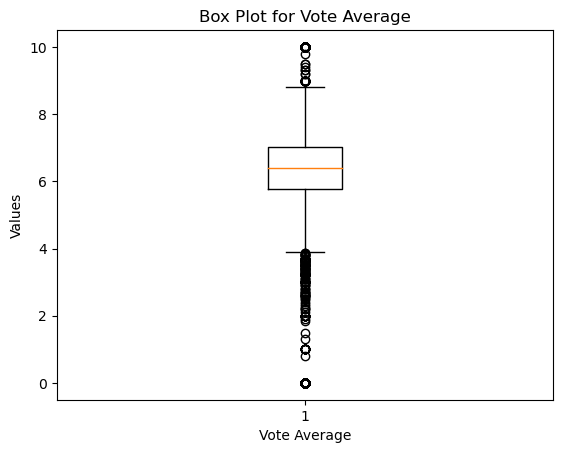

In [86]:
# Box plot for Vote Average
plt.boxplot(df2[["vote_average"]])
plt.title("Box Plot for Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Values")
plt.show()

The above box plot is plotted to look at the data distribution of vote averages. This is done to find out where the data points for vote averages are more concentrated at and also to find out if there are any outliers.

Inference: 

From the above box plot, we can infer that the first quartile value of vote average is close to 6, mean value is approximately 6.5 and third quartile is approximately 7. Though there are large number of data points away from the whiskers, these are not considered outlier values because these values are in the range of (0,10) for vote averages which makes sense that the vote average can be any value on a scale of 10.

In [87]:
df2.columns

Index(['title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'original_language', 'popularity',
       'genres', 'spoken_languages', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [88]:
df2.head()

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,spoken_languages,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Inception,8.364,34495,2010-07-15,825532764,148,False,160000000,English,83.952,"Action, Science Fiction, Adventure","English, French, Japanese, Swahili",True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,Interstellar,8.417,32571,2014-11-05,701729206,169,False,165000000,English,140.241,"Adventure, Drama, Science Fiction",English,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,185000000,English,130.643,"Drama, Action, Crime, Thriller","English, Mandarin",True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
3,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,English,79.932,"Action, Adventure, Fantasy, Science Fiction","English, Spanish",True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,English,98.082,"Science Fiction, Action, Adventure","English, Hindi, Russian",True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


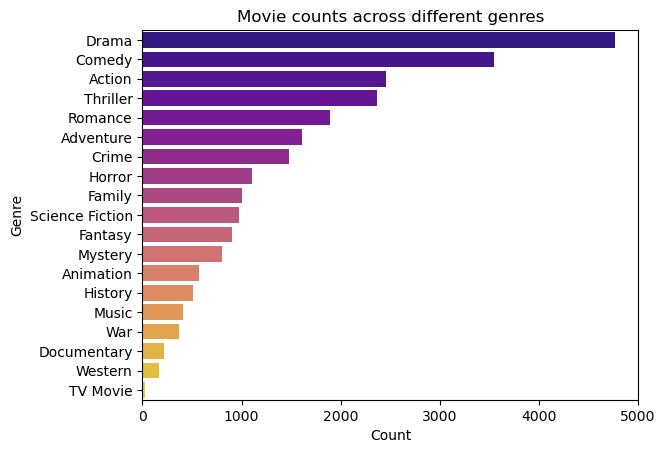

In [89]:
temp=df2.iloc[:,12:].sum().sort_values(ascending=False).reset_index()

temp

temp.columns

# Looking at movie counts by each genre
sns.barplot(y=temp["index"],x=temp[0],palette="plasma")
plt.title("Movie counts across different genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

The above bar plot is drawn to look at the number of movies across different genres. For this, we have chosen all genres and aggregated the movie counts across each genre.

Inference:

From the above bar plot, we can infer that Drama genre has highest number of movies followed by Comedy and Action. TV Movie genre had least number of movies released.

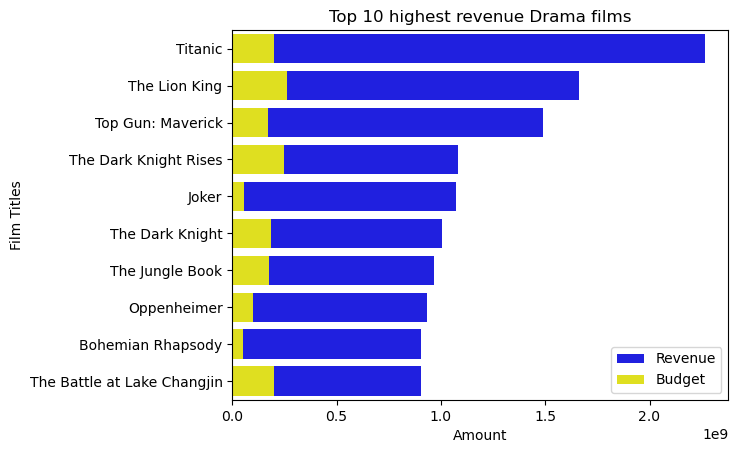

In [90]:
# Looking at top 10 highest revenue collected films in drama genre
temp=df2[df2["Drama"]==True][["title","budget","revenue"]].sort_values("revenue",ascending=False).iloc[:10,:]

temp

# Horizontal Bar plot for top 10 highest revenue collected drama films
sns.barplot(x='revenue', y='title', data=temp, color='blue', label='Revenue')
sns.barplot(x='budget', y='title', data=temp, color='yellow', label='Budget')
plt.title("Top 10 highest revenue Drama films")
plt.xlabel("Amount")
plt.ylabel("Film Titles")
plt.legend()
plt.show()

The above bar plot is drawn to look at the top 10 highest revenue grossers in drama genre. We also wanted to look at the budget spent for these films. To plot this, we have chosen drama genre and sorted the films in descending order based on revenue.

Inference:

From the above bar plot, we can infer that Titanic is the movie with highest revenue collected in drama genre. It has a budget amount close to 200 Million and revenue collected is approximately 2300 Million

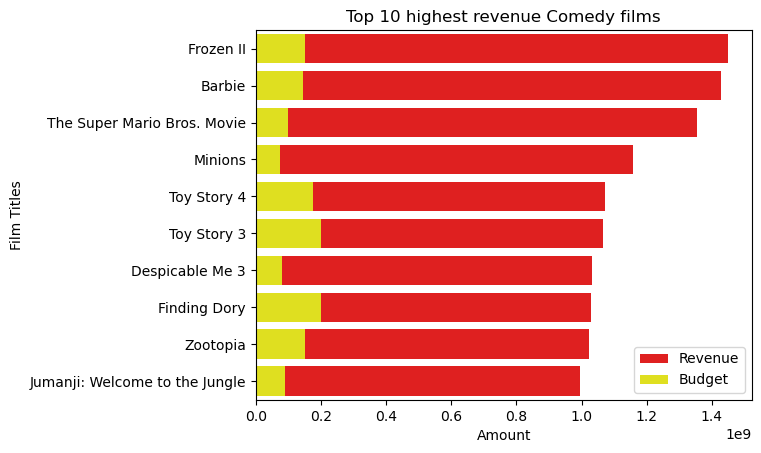

In [91]:
# Looking at top 10 highest revenue collected films in comedy genre
temp=df2[df2["Comedy"]==True][["title","budget","revenue"]].sort_values("revenue",ascending=False).iloc[:10,:]

temp

# Horizontal Bar plot for top 10 highest revenue collected comedy films
sns.barplot(x='revenue', y='title', data=temp, color='red', label='Revenue')
sns.barplot(x='budget', y='title', data=temp, color='yellow', label='Budget')
plt.title("Top 10 highest revenue Comedy films")
plt.xlabel("Amount")
plt.ylabel("Film Titles")
plt.legend()
plt.show()

The above bar plot is drawn to look at the top 10 highest revenue grossers in comedy genre. We also wanted to look at the budget spent for these films. To plot this, we have chosen comedy genre and sorted the films in descending order based on revenue.

Inference:

From the above bar plot, we can infer that Frozen II is the movie with highest revenue collected in comedy genre. It has a budget amount close to 150 Million and revenue collected is approximately 1450 Million

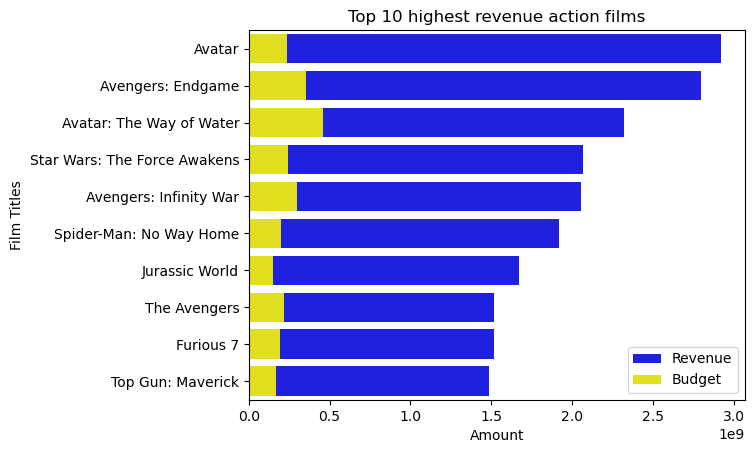

In [92]:
# Looking at top 10 highest budget spent films in action genre
temp=df2[df2["Action"]==True][["title","budget","revenue"]].sort_values("revenue",ascending=False).iloc[:10,:]

temp

# Horizontal Bar plot for top 10 highest revenue collected action films
sns.barplot(x='revenue', y='title', data=temp, color='blue', label='Revenue')
sns.barplot(x='budget', y='title', data=temp, color='yellow', label='Budget')
plt.title("Top 10 highest revenue action films")
plt.xlabel("Amount")
plt.ylabel("Film Titles")
plt.legend()
plt.show()

The above bar plot is drawn to look at the top 10 highest revenue grossers in action genre. We also wanted to look at the budget spent for these films. To plot this, we have chosen action genre and sorted the films in descending order based on revenue.

Inference:

From the above bar plot, we can infer that Avatar is the movie with highest revenue collected in action genre. It has a budget amount close to 230 Million and revenue collected is approximately 2900 Million.

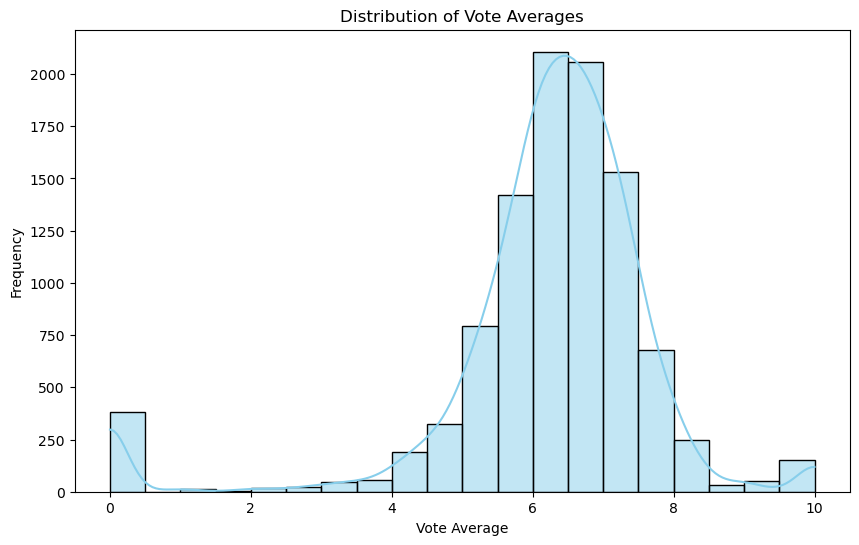

In [93]:
# Histogram plot to look at data distribution for vote averages
plt.figure(figsize=(10, 6))
sns.histplot(df2['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

The above histogram plot is drawn to look at the data distribution of vote averages. To plot this, we have chosen vote average column and plotted it on a histogram.

Inference:

From the above histogram plot, we can infer that the histogram follows approximately normal distribution resembling a bell curve with a mean of approximately 6.2.

In [94]:
df2["original_language"].value_counts().reset_index()

,original_language,count
0,English,7788
1,Hindi,325
2,French,284
3,Russian,213
4,Spanish,177
5,Chinese,136
6,Japanese,115
7,Tamil,103
8,Persian,101
9,Italian,96


In [95]:
df2[df2["original_language"]=="Telugu"]

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,spoken_languages,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
3733,RRR,7.811,1068,2022-03-24,160000000,186,False,69000000,Telugu,40.751,"Action, Drama","English, Telugu",True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5089,Bāhubali: The Beginning,7.554,696,2015-07-10,90747520,158,False,25130430,Telugu,20.925,"Action, Adventure, Drama, Fantasy","Sanskrit, Telugu",True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5379,Bāhubali 2: The Conclusion,7.394,642,2017-04-27,275947313,168,False,31000000,Telugu,21.083,"Action, Adventure, Fantasy",Telugu,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
12855,Eega,7.037,174,2012-07-05,19450000,145,False,5990000,Telugu,7.433,"Fantasy, Action, Comedy",Telugu,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
20250,Arjun Reddy,7.300,84,2017-08-25,8000000,187,False,780000,Telugu,8.369,"Romance, Drama, Action",Telugu,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
21844,The Ghazi Attack,7.000,74,2017-02-17,4300000,126,False,1900000,Telugu,9.683,"Action, War, Thriller, History",Telugu,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
22071,Saaho,6.041,73,2019-08-29,55000000,171,False,51000000,Telugu,7.418,"Action, Thriller",Telugu,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
23334,Ala Vaikunthapurramuloo,6.800,67,2020-01-12,28859072,165,False,14000000,Telugu,8.167,"Action, Comedy, Drama","Hindi, Telugu",True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
31989,Mahanati,7.525,40,2018-05-09,11589600,176,False,4346100,Telugu,4.764,Drama,Telugu,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
36901,Sarrainodu,6.547,32,2016-04-08,19059053,161,False,7503564,Telugu,5.326,"Action, Drama",Telugu,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


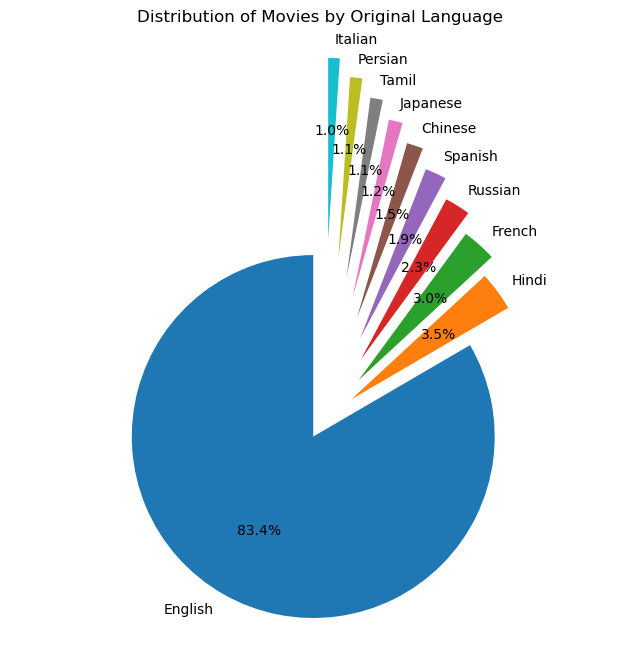

In [96]:
# Looking at top 10 languages with highest number of movies released
temp=df2["original_language"].value_counts().reset_index().iloc[0:10,:]

temp

top5lang=temp["original_language"][:5]

# Pie chart for looking at percentage share of top 10 languages with highest number of movies in each language
exp = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1)
plt.figure(figsize=(8, 8))
plt.pie(temp["count"], labels=temp["original_language"], autopct='%1.1f%%', startangle=90,explode=exp)
plt.title('Distribution of Movies by Original Language')
plt.axis('equal')
plt.xticks(rotation=90)
plt.show()


The above pie chart is drawn to look at the percentage share of the top 10 languages with highest movies released in overall. To plot this, we have took the aggregate of movie counts across each language and then sorted it in descending order.

Inference:

From the above pie chart, we can infer that English language movies are largely watched all over the world followed by Hindi and French.

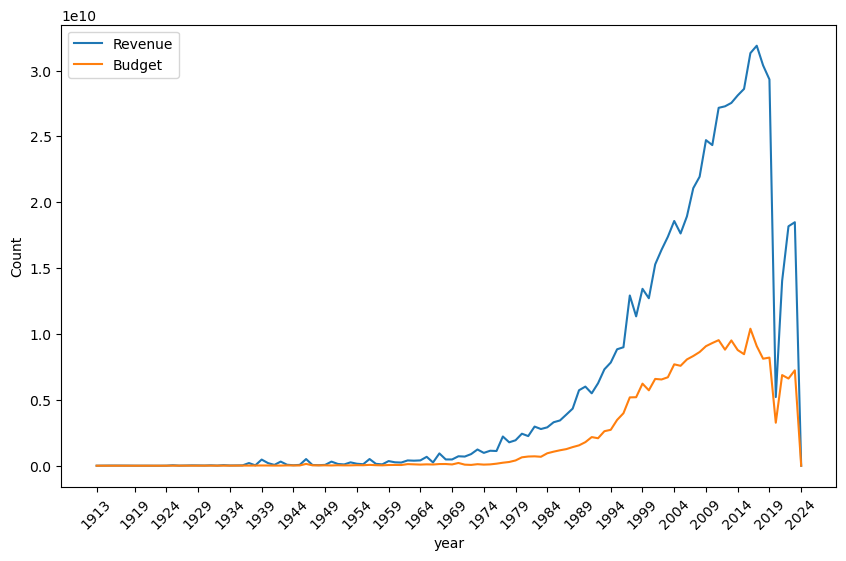

In [97]:
# Creating a new year column from "release_date" column
df2['year'] = pd.to_datetime(df2["release_date"]).dt.year

# Aggregating revenue and budget at year level
temp=df2.groupby("year")[["revenue","budget"]].sum().reset_index()

temp.head()

# Line plot to look at budget spent and revenue collected over the years
plt.figure(figsize=(10,6))
sns.lineplot(x=temp["year"] , y= temp["revenue"],label='Revenue')
sns.lineplot(x=temp["year"] , y= temp["budget"],label='Budget')
years = temp["year"]
plt.xticks(years[::5], years[::5], rotation=45)
plt.ylabel("Count")
plt.show()

The above line plot is drawn to look at the revenue and budget trends over the years. For this, we have chosen budget and revenue columns and plotted their values against years.

Inference:

From the above line trend, we can see highest peaks for budget spent and revenue collected during 2009 to 2019. In the very initial years i.e., 1913 to 1974, when there was no technological advancement in movie industry, there is very little budget spent and revenue collected.

In [98]:
# Looking at movie counts across different languages in each year
df2[["year","original_language"]].value_counts().reset_index().sort_values("count",ascending=False).head()

,year,original_language,count
0,2018,English,245
1,2016,English,241
2,2007,English,238
3,2011,English,238
4,2006,English,237


Text(0.5, 1.0, 'Distribution of top 5 language movies over past 10 years')

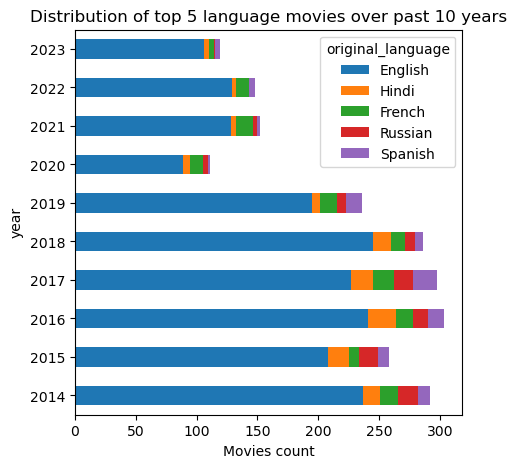

In [99]:
temp=df2[['year','original_language']].pivot_table(index='year', columns='original_language',values = 'original_language',aggfunc='size')

temp.head()

temp=temp.replace(np.nan,0)

temp.head(10)

temp=temp.iloc[100:-1,:]

temp=temp[top5lang]

# Looking at movie counts distribution for recent 10 years across the top 5 languages with highest movies relased
temp

# Stacked horizontal bar chart for looking at Distribution of top 5 language movies over past 10 years
temp.plot(kind='barh',figsize=(5,5),stacked=True)
plt.xlabel("Movies count")
plt.title("Distribution of top 5 language movies over past 10 years")

The above stacked bar chart is drawn to look at the distribution of top 5 language movies over past 10 years. For this, we have looked at movie counts across different languages in each year and sorted them descending based on number of movies released.

Inference:

From the above stacked bar chart, we can infer that in the past 10 years, 2016 year has highest number of movies released and 2020 with least number of movies released. In every year, we can infer that english language movies were majorly released.

Text(0.5, 1.0, 'Correlation Matrix')

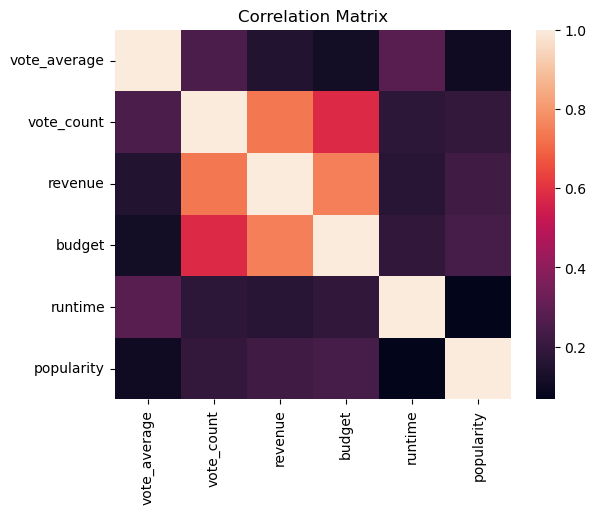

In [100]:
# Heat map for vote average, vote counts, revenue, budget, runtime, and popularity columns
sns.heatmap(df2[["vote_average","vote_count","revenue","budget","runtime","popularity"]].corr())
plt.title("Correlation Matrix")

The above heat map or correlation matrix is drawn to look at the correlation among vote average, vote counts, revenue, budget, runtime, and popularity score.

Inference:
    
From the above heat map, we can infer that revenue and vote counts, budget and revenue are highly correlated.

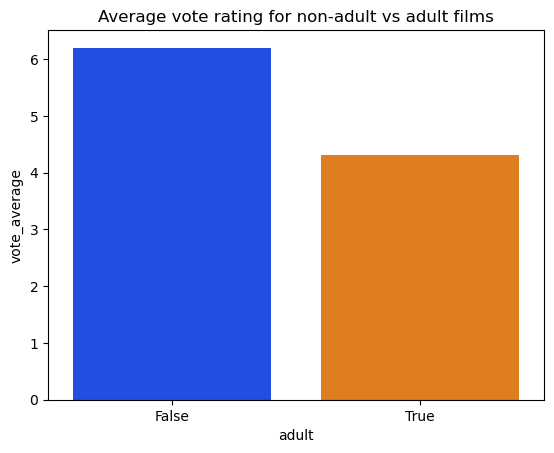

In [101]:
# Mean vote average value by adult characteristic
temp=df2.groupby("adult")["vote_average"].mean().reset_index()

temp

# Bar plot for average vote rating by non-adult v/s adult movies
sns.barplot(x=temp["adult"],y=temp["vote_average"],palette="bright")
plt.title("Average vote rating for non-adult vs adult films")
plt.show()

The above bar plot is drawn to look at the vote average received for a movie across non-adult movies and adult movies. To plot this, we have calculated the metric, mean vote average values for adult and non-adult movies.

Inference:

From the above bar plot, we can infer that the vote average received for any non- adult movie approximately 6.2 and for adult movies it is aorund 4.3.

In [102]:
df2[["runtime","vote_average"]].head()

,runtime,vote_average
0,148,8.364
1,169,8.417
2,152,8.512
3,162,7.573
4,143,7.710


In [103]:
df2["runtime"].describe()

count    10121.000000
mean       107.522972
std         26.574437
min          1.000000
25%         93.000000
50%        104.000000
75%        120.000000
max        300.000000
Name: runtime, dtype: float64

In [104]:
# Looking at runtimes with less than 50 minutes
df2[df2["runtime"]<50].shape

(209, 32)

In [105]:
df2[(df2["runtime"]<100)&(df2["runtime"]>=50)].shape

(3775, 32)

In [106]:
df2[(df2["runtime"]<120)&(df2["runtime"]>=100)].shape

(3523, 32)

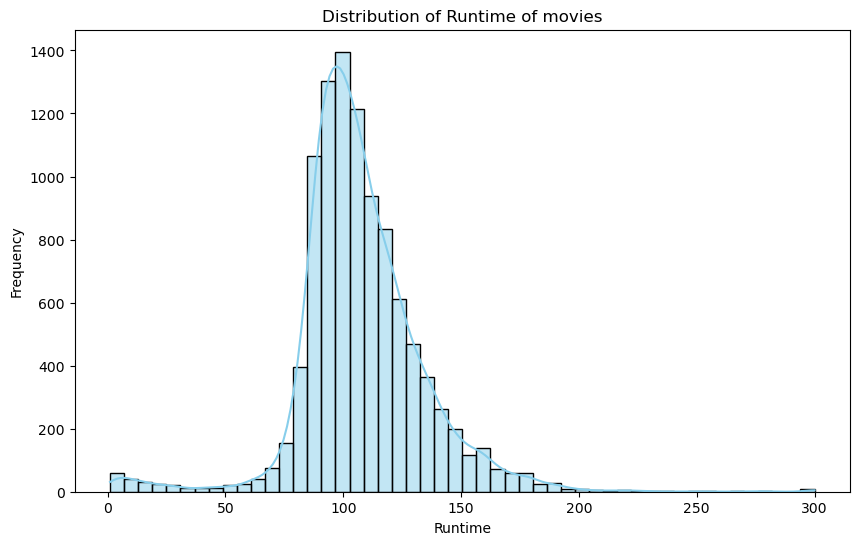

In [107]:
# Histogram plot for runtime
plt.figure(figsize=(10, 6))
sns.histplot(df2['runtime'],bins=50, kde=True, color='skyblue')
plt.title('Distribution of Runtime of movies')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

The above histogram plot is drawn to look at the data distribution of runtimes. To plot this, we have chosen runtime column and plotted it on a histogram.

Inference:

From the above histogram plot, we can infer that the histogram follows approximately normal distribution resembling a bell curve with a runtime mean of approximately 108 minutes.

In [108]:
# Creating bins for categorizing runtimes
bins=[0,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,301]

In [109]:
labels = ["0 to 50","50 to 60","60 to 70","70 to 80","80 to 90","90 to 100","100 to 110","110 to 120","120 to 130","130 to 140","140 to 150","150 to 160","160 to 170","170 to 180","180 to 190","190 to 200","200 to 300"]

In [110]:
df2['runtimecat'] = pd.cut(df2['runtime'], bins=bins, labels=labels, right=False)

In [111]:
# Calculating Mean vote average value across each runtime category
temp=df2.groupby("runtimecat")["vote_average"].mean().reset_index()

In [112]:
temp

,runtimecat,vote_average
0,0 to 50,3.600392
1,50 to 60,4.590394
2,60 to 70,5.017953
3,70 to 80,5.708819
4,80 to 90,5.780513
5,90 to 100,5.947503
6,100 to 110,6.273953
7,110 to 120,6.505483
8,120 to 130,6.635359
9,130 to 140,6.754584


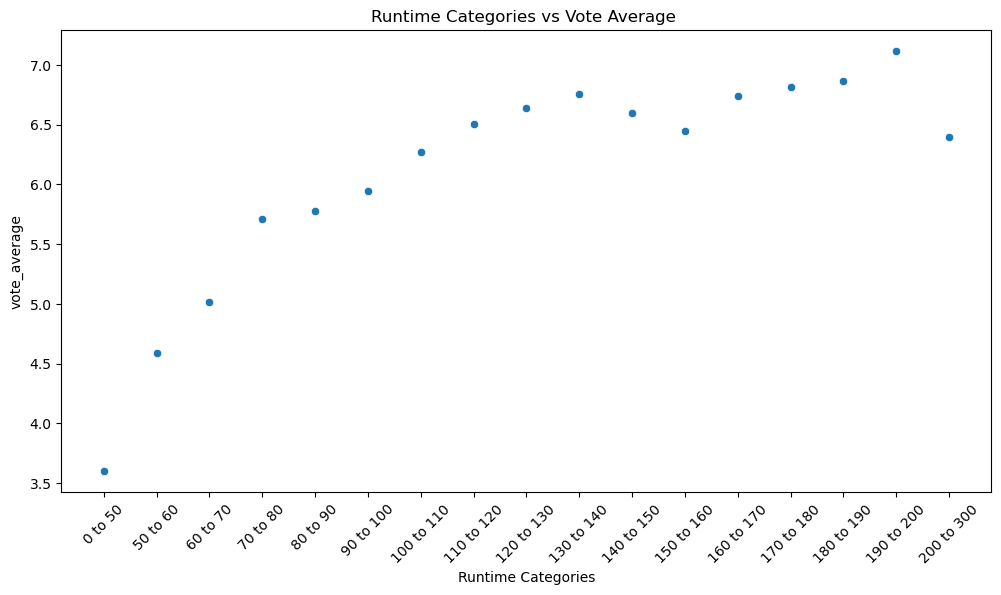

In [113]:
# Scatter Plot for runtime categories v/s vote average
plt.figure(figsize=(12, 6))
sns.scatterplot(x=temp["runtimecat"],y=temp["vote_average"])
plt.xticks(rotation=45)
plt.xlabel("Runtime Categories")
plt.title("Runtime Categories vs Vote Average ")
plt.show()

The above scatter plot is drawn to look at the variation of vote average values w.r.t runtime categories. For this, we have calculated mean vote average value across each runtime category and plotted it.

Inference:

From the above scatter plot, we can infer that as the runtime of movie increases, the mean vote average value increases till 190 to 200 minutes but decreases after 200 to 300 minutes,indicating that users tend to like and rate movies with longer runtimes (ideal being 190 to 200 minutes) but not too long.

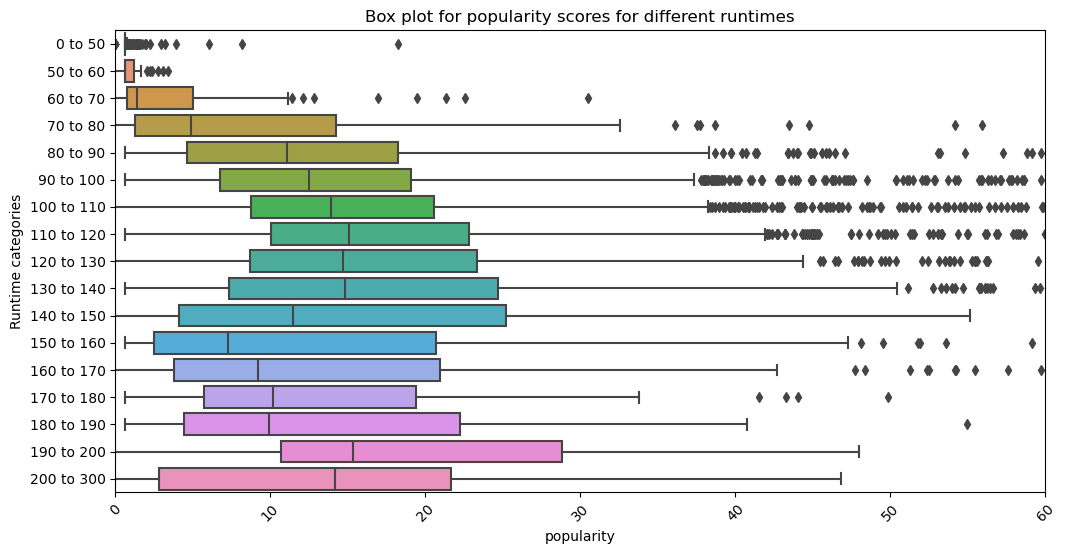

In [121]:
# Box plot of runtime categories vs popularity score
plt.figure(figsize=(12, 6))
sns.boxplot(y=df2["runtimecat"],x=df2["popularity"])
plt.xlim(0,60)
plt.xticks(rotation=45)
plt.title("Box plot for popularity scores for different runtimes")
plt.ylabel("Runtime categories")
plt.show()

The above box plot is drawn to look at the data distribution of poularity score across different runtimes. For this, we have took popularity score data and box plotted it across different runtimes.

Inference:

From the above box plot, we can observe the data distribution of popularity score across different runtimes. We can infer that there are more movies with higher popularity scores in the runtimes ranging from 70 to 140 minutes. Almost across all runtime categories, we can infer that there are more data points concentrated with popularity scores ranging from 5 to 30.

In [115]:
df2[["budget","revenue","vote_average"]].head()

,budget,revenue,vote_average
0,160000000,825532764,8.364
1,165000000,701729206,8.417
2,185000000,1004558444,8.512
3,237000000,2923706026,7.573
4,220000000,1518815515,7.710


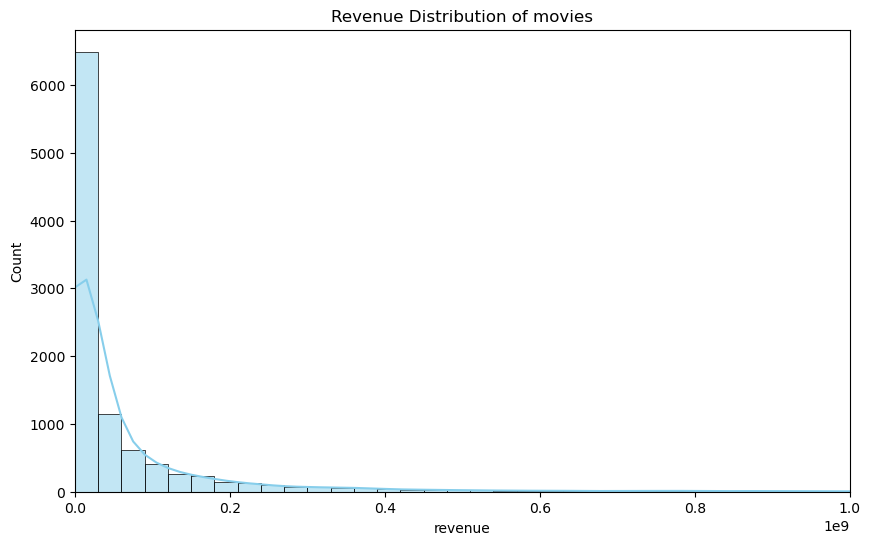

In [116]:
# Histogram plot for revenue
plt.figure(figsize=(10, 6))
sns.histplot(df2['revenue'],bins=100, kde=True, color='skyblue')
plt.title('Revenue Distribution of movies')
plt.xlim(0,1000000000)
plt.show()

The above histogram plot is drawn to observe data distribution of revenue. For this, we chose revenue column and plotted a histogram.

Inference:

From the above plot, we can infer that revenue follows a geometric data distribution.

In [117]:
df2["release_date"].head()

0   2010-07-15
1   2014-11-05
2   2008-07-16
3   2009-12-15
4   2012-04-25
Name: release_date, dtype: datetime64[ns]

In [118]:
df2["month"]=pd.to_datetime(df2["release_date"]).dt.month

In [119]:
df2[["budget","revenue","vote_average","year","month"]].head()

,budget,revenue,vote_average,year,month
0,160000000,825532764,8.364,2010,7
1,165000000,701729206,8.417,2014,11
2,185000000,1004558444,8.512,2008,7
3,237000000,2923706026,7.573,2009,12
4,220000000,1518815515,7.710,2012,4


/Users/viratgowtham/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


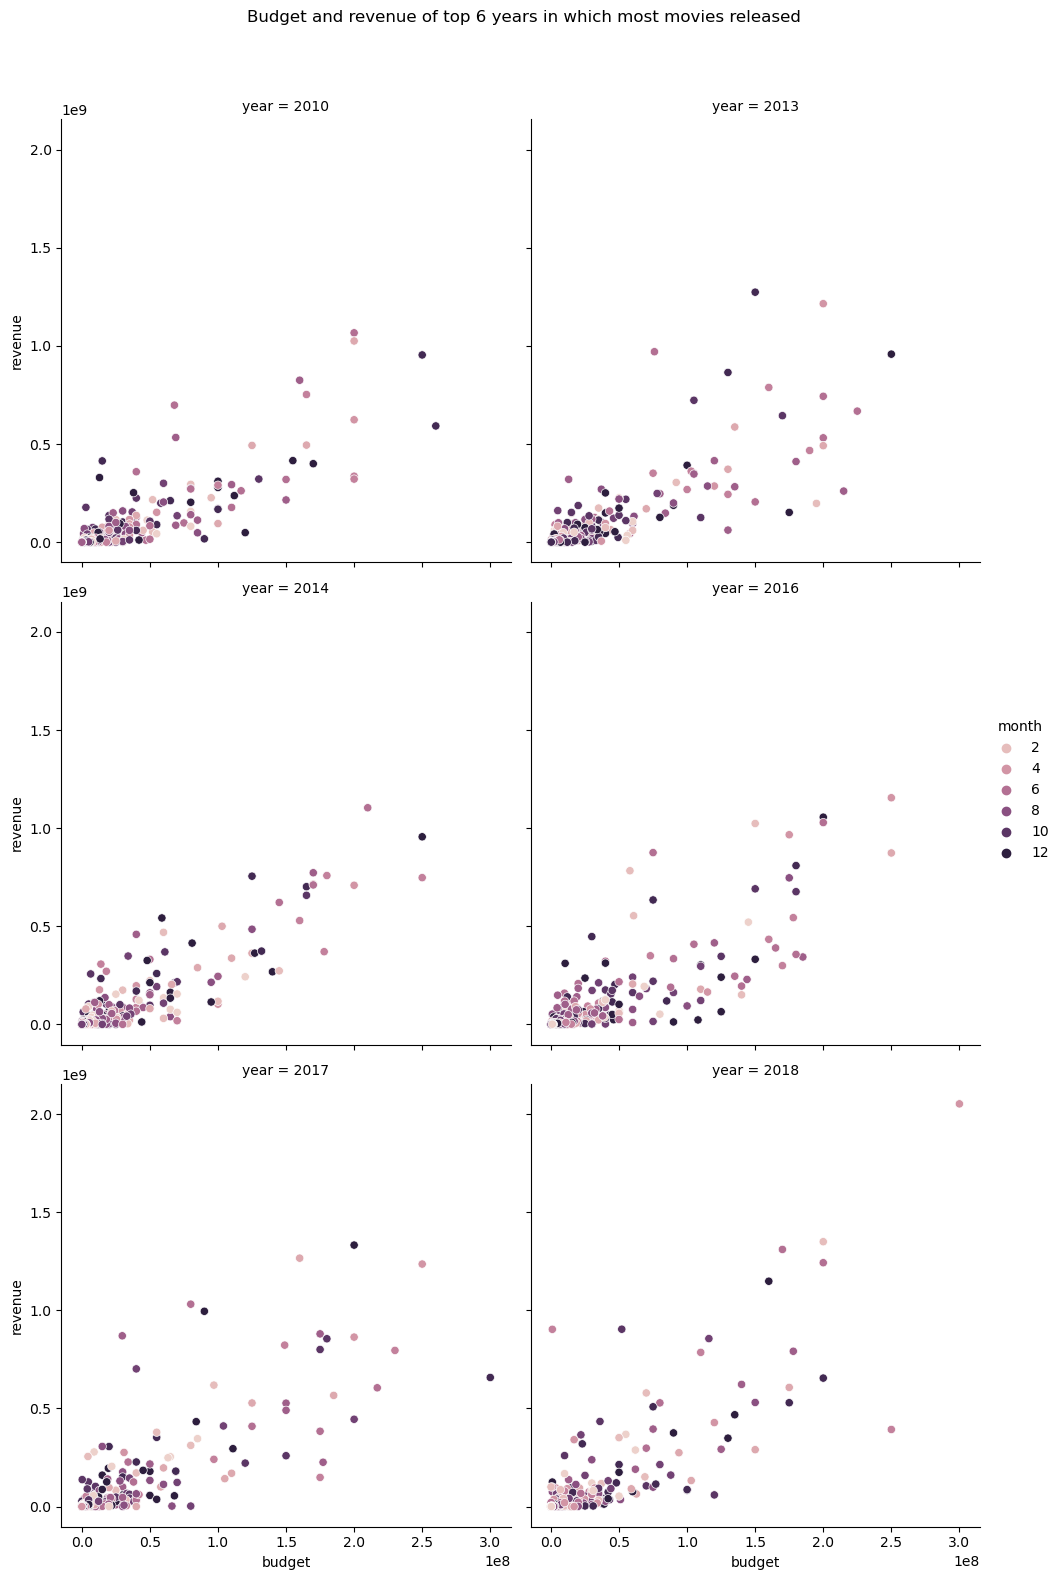

In [120]:
# Looking at the top 6 years with highest number of mvies released
top6years=np.array(df2["year"].value_counts().reset_index().sort_values("count",ascending=False).iloc[:6,0])

top6years

temp=df2[df2["year"].isin(top6years)]

temp[["budget","revenue","vote_average","year","month"]].head()

# Relational Plot for revenue v/s budget across each month for the top 6 years with highest movies released
sns.relplot(data=temp, x="budget", y="revenue", hue="month", col="year", col_wrap=2)
plt.suptitle("Budget and revenue of top 6 years in which most movies released", y=1.05)
plt.show()

The above relational plot is drawn for the top 6 years, month-wise, with highest number of movies released for revenue and budget columns. To plot this, we aggregated movie counts from highest to lowest and identified top 6 years with highest number of movies released. Then we plotted revenue and budget columns month-wise to see the distribution of data points.

Inference:

From the above relational plot, we can infer that almost in all the top 6 years with highest number of movies released (month-wise), there are more number of films concentraed more on low revenue and low budget and with vey few scattered towards high revenue and high budget.